## Oscilador armónico cuántico bajo el efecto de un campo eléctrico de magnitud constante

### Convergencia

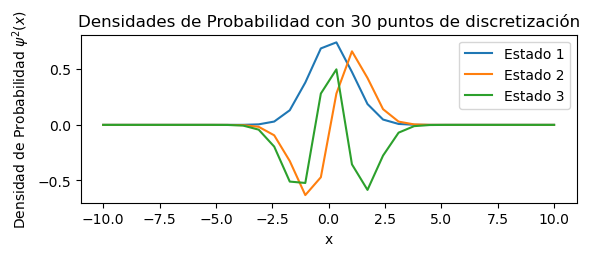

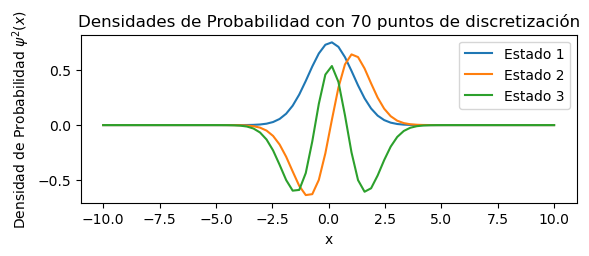

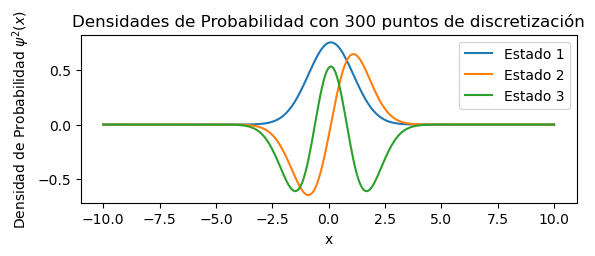

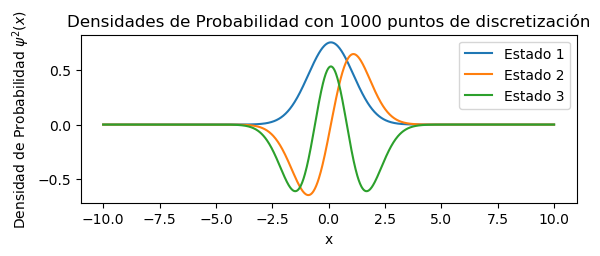

In [2]:
#Primero se introducen las librerias a utilizar para problema
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = 1.0
omega = 1.0
q = 1.0
epsilon = 0.1
h_bar = 1.0

# Parámetros de discretización
x_max = 10

for num_points in [30,70,300,1000]: #Entre más puntos más fina será la respuesta
    x_values = np.linspace(-x_max, x_max, num_points)
    dx = x_values[1] - x_values[0]


    # Potencial
    V = 0.5 * m * omega**2 * x_values**2 - q * epsilon * x_values

    # Matriz Hamiltoniana
    T = (-0.5 * h_bar**2 / m) * (np.diag(np.ones(num_points-1), -1) - 2*np.diag(np.ones(num_points), 0) + np.diag(np.ones(num_points-1), 1)) / dx**2
    V_matrix = np.diag(V)
    H = T + V_matrix

    # Encontrar autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # Funciones de onda
    psi = eigenvectors.T

    # Normalizar las funciones de onda
    psi /= np.sqrt(dx)  # Normalización apropiada para que la integral sea 1

    # Calcular las densidades de probabilidad
    probability_density = np.abs(psi)**2
    
    states_to_plot = [0, 1, 2] #Estados para graficar

    plt.subplot(2, 1, 1)
    
    for i in states_to_plot:
        plt.plot(x_values, psi[i], label=f'Estado {i+1}')

    plt.xlabel('x')
    plt.ylabel('Densidad de Probabilidad $\psi^2 (x)$')
    plt.legend()
    plt.title('Densidades de Probabilidad con '+ str(num_points)+ ' puntos de discretización')
    plt.show()
    
    

### Niveles de energía asociados a la solución del problema
A continuación se presentan los niveles de energía $E_n$ asociados a la solución del oscilador armónico cuántico bajo un campo eléctrico de magnitud constante.

Valores de energía=> [0.49498747 1.49493737 2.49483716 3.49468685 4.49448641 5.49423587
 6.4939352  7.4935844  8.49318348 9.49273243]
Valores de energía teóricos=> [0.495 1.495 2.495 3.495 4.495 5.495 6.495 7.495 8.495 9.495]


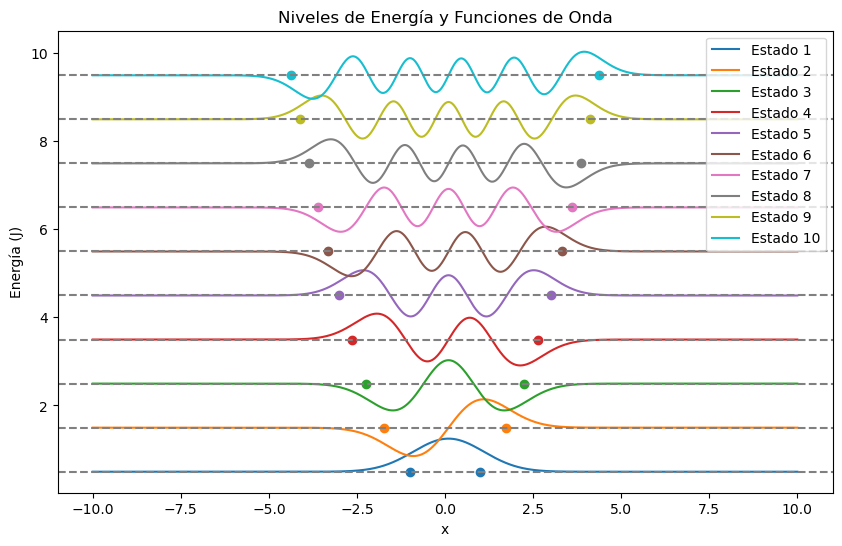

In [20]:
# Calcular los niveles de energía
energy_levels = eigenvalues[:10]  # Se puede ajustar el número de niveles a mostrar
states_to_plot = list(range(0, 10)) #Estados para graficar
print("Valores de energía=>",energy_levels)

#Valores teóricos
energia= np.linspace(0, 9, 10)
for e in range(0,10):
    energia[e]=h_bar*omega*(e+1/2)-(q**(2)*epsilon**(2))/(2*m*omega)    
print("Valores de energía teóricos=>", energia)

# Graficar las funciones de onda
plt.figure(figsize=(10, 6))
for i in range(len(states_to_plot)): #states to plot son las funciones de onda previamente definidas a graficar
    plt.plot(x_values, psi[states_to_plot[i]] + energy_levels[states_to_plot[i]], label=f'Estado {states_to_plot[i]+1}')
    plt.scatter([-np.sqrt(2*(states_to_plot[i]+1/2)*h_bar/(m*omega)),np.sqrt(2*(states_to_plot[i]+1/2)*h_bar/(m*omega))],[energy_levels[states_to_plot[i]],energy_levels[states_to_plot[i]] ])
    #Se utiliza el scatter, para graficar los puntos clásicos, despejados del hamiltoniano clásico de una partícula en los extremos de oscilación. Para más precisión, se puede añadir el efecto del campo eléctrico, desde el hamiltoniano clásico, y despejar el límite clásico de oscilación.
    
# Graficar líneas horizontales para los niveles de energía
for energy in energy_levels:
    plt.axhline(y=energy, color='gray', linestyle='--')

plt.xlabel('x')
plt.ylabel('Energía (J)')
plt.title('Niveles de Energía y Funciones de Onda')
plt.legend()
plt.show()
